# Part A

Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables

In [141]:
Normal = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Supervised Learning\Normal.csv')
Type_H = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Supervised Learning\Type_H.csv')
Type_S = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Supervised Learning\Type_S.csv')

1.B. Print Shape and columns of all the 3 DataFrames

In [65]:
Normal.shape

(100, 7)

In [66]:
Normal.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [67]:
Type_H.shape

(60, 7)

In [68]:
Type_H.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [69]:
Type_S.shape

(150, 7)

In [70]:
Type_S.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

1.C. Compare Column names of all the 3 DataFrames and clearly write observations

In [71]:
print(Normal.columns == Type_H.columns)
print(Normal.columns == Type_S.columns)
print(Type_H.columns == Type_H.columns)

[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True]


Conclusion: All column names in all the 3 dataframes are exaclty the same

1.D. Print DataTypes of all the 3 DataFrames

In [14]:
Normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [15]:
Type_H.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [16]:
Type_S.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

The data type of "Class" column is object while the rest all columns are float for all 3 dataframes. Hence, these dataframes can be merged without any type conversion requirement since all the columns data types are same for all the 3 dataframes.

1.E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

In [17]:
Normal["Class"].unique()

array(['Normal', 'Nrmal'], dtype=object)

In [18]:
Type_H["Class"].unique()

array(['Type_H', 'type_h'], dtype=object)

In [19]:
Type_S["Class"].unique()

array(['Type_S', 'tp_s'], dtype=object)

Class Column definitely requires data cleaning for all 3 dataframes since the values are not unique though they mean the same Class. For eg. Normal and Nrmal means the same though the spellings are different and hence requires cleaning.

Question 2

2.A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [142]:
Normal["Class"] = Normal["Class"].replace("Normal", "normal")
Normal["Class"] = Normal["Class"].replace("Nrmal", "normal")

In [143]:
Normal["Class"].unique()

array(['normal'], dtype=object)

In [144]:
Type_H["Class"] = Type_H["Class"].replace("Type_H", "type_h")

In [145]:
Type_H["Class"].unique()

array(['type_h'], dtype=object)

In [146]:
Type_S["Class"] = Type_S["Class"].replace("Type_S", "type_s")
Type_S["Class"] = Type_S["Class"].replace("tp_s", "type_s")

In [147]:
Type_S["Class"].unique()

array(['type_s'], dtype=object)

2.B. Combine all the 3 DataFrames to form a single DataFrame

In [148]:
Combined_DF = pd.concat([Normal, Type_H, Type_S], ignore_index=True)

In [149]:
Combined_DF.shape

(310, 7)

2.C. Print 5 random samples of this DataFrame

In [46]:
Combined_DF.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
45,67.538182,14.655042,58.001429,52.883139,123.632260,25.970206,normal
57,52.862214,9.410372,46.988052,43.451842,123.091240,1.856659,normal
71,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,normal
145,50.912440,23.015169,47.000000,27.897271,117.422259,-2.526702,type_h
36,46.637864,15.853717,40.000000,30.784147,119.377603,9.064582,normal


2.D. Print Feature-wise percentage of Null values

In [47]:
Combined_DF.isnull().sum() * 100 / len(Combined_DF)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

2.E. Check 5-point summary of the new DataFrame

In [43]:
Combined_DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


Question 3

3.A. Visualize a heatmap to understand correlation between all features

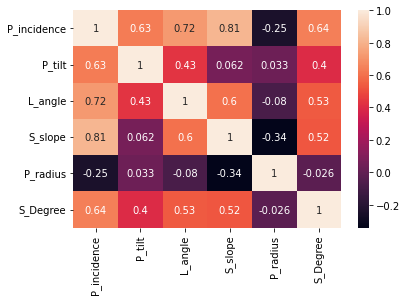

In [8]:
sns.heatmap(Combined_DF.corr(), annot=True) 
plt.show()

3.B. Share insights on correlation

Below is the reference for the strength of correlation,
1. Very Strong: between ± 0.80 and ± 1
2. Strong: between ± 0.60 and ± 0.79 
3. Moderate: between ± 0.40 and ± 0.59 
4. Weak: between ± 0.20 and ± 0.39
5. Very Weak: between 0 and ± 0.19

3.B.A. Features having stronger correlation with correlation value,

1. Very Strong: (P_incidence, S_slope) = 0.81
2. Strong: (P_incidence, P_tilt) = 0.63, (P_incidence, L_angle) = 0.72, (P_incidence, S_degree) = 0.64, (L_angle, S_Slope) = 0.6

3.B.B. Features having weaker correlation with correlation value,

1. Weak: (P_incidence, P_radius) = -0.25, (S_slope, P_radius) = -0.34
2. Very Weak: (P_tilt, S_slope) = 0.062, (P_tilt, P_radius) = 0.033, (L_angle, P_radius) = -0.08, (P_radius, S_degree) = -0.026

3.C. Visualize a pairplot with 3 classes distinguished by colors and share insights

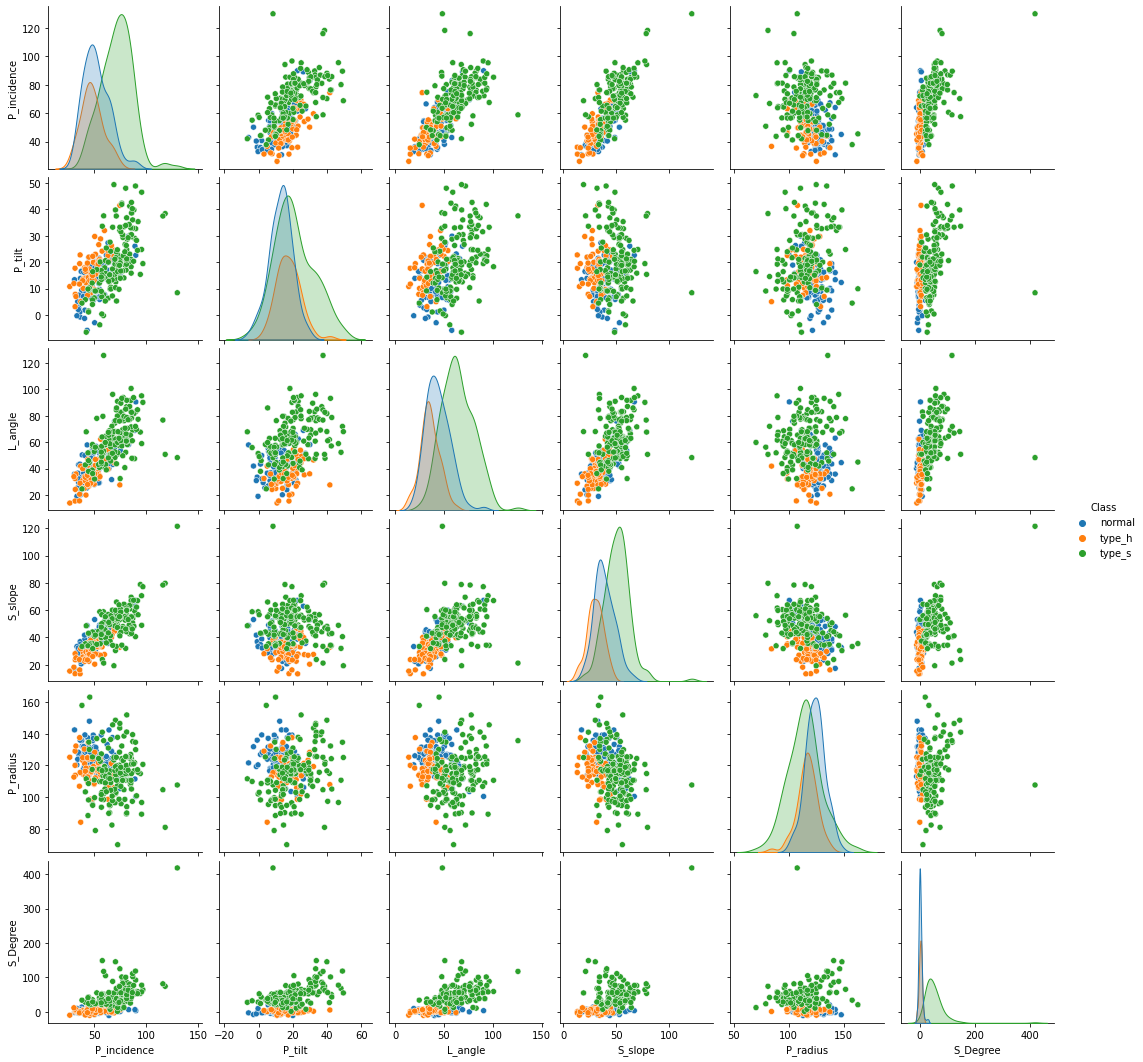

In [11]:
sns.pairplot(Combined_DF, hue="Class")
plt.show()

Conclusion: "type_s" is the most frequent occuring class. All classes show similar pattern w.r.t correlation with the exception of type_s class having few outliers in all the pair plots.

3.D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights

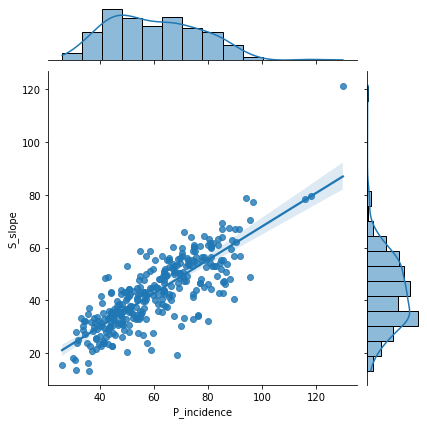

In [56]:
sns.jointplot(x = "P_incidence", y = "S_slope", data = Combined_DF, kind="reg")
plt.show()

Conclusion: P_incidence and S_slope are strong positively correlated and each of these individual features are approximately normally distributed (skewed).

3.E. Visualize a boxplot to check distribution of the features and share insights

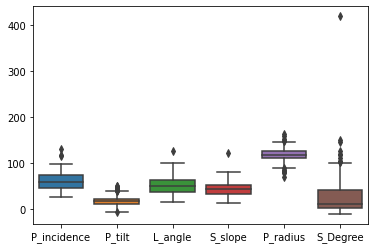

In [57]:
sns.boxplot(Combined_DF)
plt.show()

Conclusion: Overall, there is not lot of variation in the data for each of the features (since the boxes are narrow and the quartiles are closer to each other) except one outlier for "S_Degree" which is more than 400.

4.A. Split data into X and Y

In [150]:
X = Combined_DF.drop(columns=["Class"]) 
y = Combined_DF[["Class"]]

4.B. Split data into train and test with 80:20 proportion

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

4.C. Train a Supervised Learning Classification base model using KNN classifier

In [174]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import fl_score

knn = KNeighborsClassifier() # base model

knn.fit(X_train, y_train.values.ravel())

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

4.D. Print all the possible performance metrics for both train and test data

In [157]:
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy_Train:", accuracy_train)
precision_train = precision_score(y_train, y_pred_train, average="macro")
print("Precision_Train:", precision_train)
recall_train = recall_score(y_train, y_pred_train, average="macro")
print("Recall_Train:", recall_train)
f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
print("F1_Score_Train:", f1_score_train)

Accuracy_Train: 0.8709677419354839
Precision_Train: 0.8324370811651761
Recall_Train: 0.8180486015096804
F1_Score_Train: 0.8251801239358266


In [169]:
mat_train = confusion_matrix(y_train,y_pred_train)

print("confusion matrix_Train = \n",mat_train)
print("classification  matrix_Train:\n",classification_report(y_train,y_pred_train))

confusion matrix_Train = 
 [[ 67  10   2]
 [ 17  29   0]
 [  3   0 120]]
classification  matrix_Train:
               precision    recall  f1-score   support

      normal       0.77      0.85      0.81        79
      type_h       0.74      0.63      0.68        46
      type_s       0.98      0.98      0.98       123

    accuracy                           0.87       248
   macro avg       0.83      0.82      0.82       248
weighted avg       0.87      0.87      0.87       248



In [163]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy_Test:", accuracy_test)
precision_test = precision_score(y_test, y_pred_test, average="macro")
print("Precision_Test:", precision_test)
recall_test = recall_score(y_test, y_pred_test, average="macro")
print("Recall_Test:", recall_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print("F1_Score_Test:", f1_score_test)

Accuracy_Test: 0.7903225806451613
Precision_Test: 0.7685475444096134
Recall_Test: 0.7495590828924161
F1_Score_Test: 0.7589345599138577


In [173]:
mat_test = confusion_matrix(y_test,y_pred_test)

print("confusion matrix_Test = \n",mat_test)
print("classification  matrix_Test:\n",classification_report(y_test,y_pred_test))

confusion matrix_Test = 
 [[15  3  3]
 [ 6  8  0]
 [ 1  0 26]]
classification  matrix_Test:
               precision    recall  f1-score   support

      normal       0.68      0.71      0.70        21
      type_h       0.73      0.57      0.64        14
      type_s       0.90      0.96      0.93        27

    accuracy                           0.79        62
   macro avg       0.77      0.75      0.76        62
weighted avg       0.79      0.79      0.79        62



Question 5

5.A. Experiment with various parameters to improve performance of the base model

In [155]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,30))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train.values.ravel())
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 15


In [171]:
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=15, p=2) 
knn.fit(X_train, y_train.values.ravel())

y_pred_test = knn.predict(X_test)

In [161]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy_Test:", accuracy_test)
precision_test = precision_score(y_test, y_pred_test, average="macro")
print("Precision_Test:", precision_test)
recall_test = recall_score(y_test, y_pred_test, average="macro")
print("Recall_Test:", recall_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print("F1_Score_Test:", f1_score_test)

Accuracy_Test: 0.8225806451612904
Precision_Test: 0.7941811275144608
Recall_Test: 0.7892416225749558
F1_Score_Test: 0.7917036706243171


In [175]:
mat_test = confusion_matrix(y_test,y_pred_test)

print("confusion matrix_Test = \n",mat_test)
print("classification  Matrix:\n",classification_report(y_test,y_pred_test))

confusion matrix_Test = 
 [[16  4  1]
 [ 5  9  0]
 [ 1  0 26]]
classification  Matrix:
               precision    recall  f1-score   support

      normal       0.73      0.76      0.74        21
      type_h       0.69      0.64      0.67        14
      type_s       0.96      0.96      0.96        27

    accuracy                           0.82        62
   macro avg       0.79      0.79      0.79        62
weighted avg       0.82      0.82      0.82        62



5.B. Clearly showcase improvement in performance achieved

Demonstrating % improvement of the performance metrics on the test data for the final model compared to the base model,
1. Accuracy: +4% improvement
2. Precision: +3.4% improvement
3. Recall: +5.3% improvement
4. F1-score: +4.3% improvement

5.C. Clearly state which parameters contributed most to improve model performance

Leaf size and number of neighbors has contributed the most for the improved model performance since they are significantly different from the default values whereas p for the base and final model is the same.

# Part B

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Question 1

1.A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables

In [103]:
Data1 = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Supervised Learning\Data1.csv')
Data2 = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Supervised Learning\Data2.csv')

1.B. Print shape and Column Names and DataTypes of both the Dataframes

In [4]:
Data1.shape

(5000, 8)

In [5]:
Data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [6]:
Data1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [7]:
Data2.shape

(5000, 7)

In [8]:
Data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [9]:
Data2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

1.C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [104]:
Data = pd.merge(Data1, Data2, how="inner", on="ID")

In [102]:
Data.shape

(5000, 14)

1.D. Change Datatype of below features to ‘Object’

‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

In [105]:
Data[["CreditCard", "InternetBanking", "FixedDepositAccount", "Security", "Level", "HiddenScore"]] = Data[["CreditCard", "InternetBanking", "FixedDepositAccount", "Security", "Level", "HiddenScore"]].astype("object")

In [106]:
Data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

Question 2

2.A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights

In [110]:
#Remove those data points where 'LoanOnCard' is NaN since imputation is generally not recommended for target variable and only 0.4% of data points are NaN
Data = Data[Data["LoanOnCard"].notnull()]

In [111]:
Data.shape

(4980, 14)

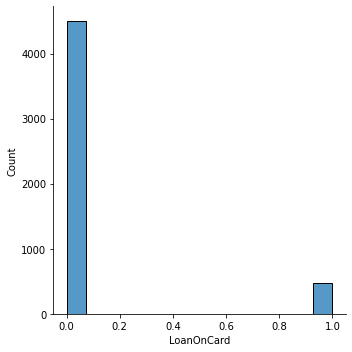

In [16]:
sns.displot(data=Data, x="LoanOnCard")
plt.show()

In [17]:
Data["LoanOnCard"].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

Conclusion: After removing the NaN data points for 'LoanOnCard', we find that the data is unbalanced with only ~10% data points as class 1 and remaining ~90% as class 0.

2.B. Check the percentage of missing values and impute if required

In [18]:
Data.isnull().sum() * 100 / len(Data)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64

Conclusion: No imputation is required since there are no missing values

2.C. Check for unexpected values in each categorical variable and impute with best suitable value

In [19]:
Data["HiddenScore"].value_counts()

1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64

In [20]:
Data["Level"].value_counts()

1    2089
3    1496
2    1395
Name: Level, dtype: int64

In [21]:
Data["Security"].value_counts()

0    4460
1     520
Name: Security, dtype: int64

In [22]:
Data["FixedDepositAccount"].value_counts()

0    4678
1     302
Name: FixedDepositAccount, dtype: int64

In [23]:
Data["InternetBanking"].value_counts()

1    2974
0    2006
Name: InternetBanking, dtype: int64

In [24]:
Data["CreditCard"].value_counts()

0    3514
1    1466
Name: CreditCard, dtype: int64

Conclusion: No unexpected values were found in any of the categorical features

Question 3

3.A. Split data into X and Y

In [112]:
X = Data.drop(columns=["LoanOnCard", "ID", "ZipCode"]) 
y = Data[["LoanOnCard"]]

3.B. Split data into train and test. Keep 25% data reserved for testing

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

3.C. Train a Supervised Learning Classification base model - Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [115]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

3.D. Print evaluation metrics for the model and clearly share insights

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [117]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy_Test:", accuracy_test)
precision_test = precision_score(y_test, y_pred_test)
print("Precision_Test:", precision_test)
recall_test = recall_score(y_test, y_pred_test)
print("Recall_Test:", recall_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print("F1_Score_Test:", f1_score_test)

Accuracy_Test: 0.9550200803212852
Precision_Test: 0.8541666666666666
Recall_Test: 0.6612903225806451
F1_Score_Test: 0.7454545454545455


In [118]:
from sklearn.metrics import classification_report,confusion_matrix
mat_test = confusion_matrix(y_test,y_pred_test)

print("confusion matrix_Test = \n",mat_test)

confusion matrix_Test = 
 [[1107   14]
 [  42   82]]


In [119]:
print("classification  Matrix:\n",classification_report(y_test,y_pred_test))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1121
         1.0       0.85      0.66      0.75       124

    accuracy                           0.96      1245
   macro avg       0.91      0.82      0.86      1245
weighted avg       0.95      0.96      0.95      1245



Conclusion: Recall value and f1-score are low and there is a possibility to improve either by hyperparameter tuning or with other ML model

3.E. Balance the data using the right balancing technique

In [33]:
X.columns

Index(['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard'],
      dtype='object')

In [120]:
# Using SMOTE technique for balancing the data
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

smote_nc=SMOTENC(categorical_features=[3,5,7,8,9,10])
x_s,y_s=smote_nc.fit_resample(X,y)

In [121]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
LoanOnCard
0.0           4500
1.0            480
dtype: int64


In [122]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
LoanOnCard
0.0           4500
1.0           4500
dtype: int64


3.F. Again train the same previous model on balanced data

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=101)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train.values.ravel())

y_pred_test = model.predict(X_test)

3.G. Print evaluation metrics and clearly share differences observed

In [124]:
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy_Test:", accuracy_test)
precision_test = precision_score(y_test, y_pred_test)
print("Precision_Test:", precision_test)
recall_test = recall_score(y_test, y_pred_test)
print("Recall_Test:", recall_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print("F1_Score_Test:", f1_score_test)

Accuracy_Test: 0.9048888888888889
Precision_Test: 0.9018181818181819
Recall_Test: 0.9034608378870674
F1_Score_Test: 0.9026387625113741


In [125]:
from sklearn.metrics import classification_report,confusion_matrix
mat_test = confusion_matrix(y_test,y_pred_test)

print("confusion matrix_Test = \n",mat_test)

confusion matrix_Test = 
 [[1044  108]
 [ 106  992]]


In [126]:
print("classification  Matrix:\n",classification_report(y_test,y_pred_test))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      1152
         1.0       0.90      0.90      0.90      1098

    accuracy                           0.90      2250
   macro avg       0.90      0.90      0.90      2250
weighted avg       0.90      0.90      0.90      2250



Conclusion: Post balancing the data using SMOTE technique and re-training the model, we get better results. Though the accuracy has dropped a bit, the precision, recall and f1-score have improved significantly.

Question 4

4.A. Train a base model each for SVM, KNN

In [127]:
features = Data.drop(columns=["LoanOnCard", "ID", "ZipCode"]) 
target = Data[["LoanOnCard"]]
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.25, random_state = 101)


SVM

In [128]:
# SVM
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train.values.ravel())

y_pred_test_svc = svc_model.predict(X_test)

In [129]:
# SVM Performance Metrics
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)
print("Accuracy_Test:", accuracy_test_svc)
precision_test_svc = precision_score(y_test, y_pred_test_svc)
print("Precision_Test:", precision_test_svc)
recall_test_svc = recall_score(y_test, y_pred_test_svc)
print("Recall_Test:", recall_test_svc)
f1_score_test_svc = 2 * (precision_test_svc * recall_test_svc) / (precision_test_svc + recall_test_svc)
print("F1_Score_Test:", f1_score_test_svc)

Accuracy_Test: 0.9060240963855422
Precision_Test: 0.7333333333333333
Recall_Test: 0.08870967741935484
F1_Score_Test: 0.15827338129496402


In [130]:
mat_test = confusion_matrix(y_test,y_pred_test_svc)

print("confusion matrix_Test = \n",mat_test)
print("classification  Matrix:\n",classification_report(y_test,y_pred_test_svc))

confusion matrix_Test = 
 [[1117    4]
 [ 113   11]]
classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1121
         1.0       0.73      0.09      0.16       124

    accuracy                           0.91      1245
   macro avg       0.82      0.54      0.55      1245
weighted avg       0.89      0.91      0.87      1245



KNN

In [131]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() 
knn.fit(X_train, y_train.values.ravel())

y_pred_test_knn = knn.predict(X_test)

In [132]:
# KNN Performance Metrics
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print("Accuracy_Test:", accuracy_test_knn)
precision_test_knn = precision_score(y_test, y_pred_test_knn)
print("Precision_Test:", precision_test_knn)
recall_test_knn = recall_score(y_test, y_pred_test_knn)
print("Recall_Test:", recall_test_knn)
f1_score_test_knn = 2 * (precision_test_knn * recall_test_knn) / (precision_test_knn + recall_test_knn)
print("F1_Score_Test:", f1_score_test_knn)

Accuracy_Test: 0.9124497991967871
Precision_Test: 0.6027397260273972
Recall_Test: 0.3548387096774194
F1_Score_Test: 0.4467005076142132


In [133]:
mat_test = confusion_matrix(y_test,y_pred_test_knn)

print("confusion matrix_Test = \n",mat_test)
print("classification  Matrix:\n",classification_report(y_test,y_pred_test_knn))

confusion matrix_Test = 
 [[1092   29]
 [  80   44]]
classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1121
         1.0       0.60      0.35      0.45       124

    accuracy                           0.91      1245
   macro avg       0.77      0.66      0.70      1245
weighted avg       0.90      0.91      0.90      1245



4.B. Tune parameters for each of the models wherever required and finalize a model

SVM

In [48]:
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   1.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   1.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   1.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.905 total time=   1.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.904 total time=   1.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   1.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   1.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   1.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.905 total time=   1.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.904 total time=   1.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.905 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [60]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [134]:
svc_model = SVC(C= 1000, kernel='rbf', gamma= 0.0001)
svc_model.fit(X_train, y_train.values.ravel())

y_pred_test_svc = svc_model.predict(X_test)

KNN

In [140]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,30))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train.values.ravel())
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 5


In [135]:
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=5, p=1) 
knn.fit(X_train, y_train.values.ravel())

y_pred_test_knn = knn.predict(X_test)

4.C. Print evaluation metrics for final model

SVM

In [136]:
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)
print("Accuracy_Test:", accuracy_test_svc)
precision_test_svc = precision_score(y_test, y_pred_test_svc)
print("Precision_Test:", precision_test_svc)
recall_test_svc = recall_score(y_test, y_pred_test_svc)
print("Recall_Test:", recall_test_svc)
f1_score_test_svc = 2 * (precision_test_svc * recall_test_svc) / (precision_test_svc + recall_test_svc)
print("F1_Score_Test:", f1_score_test_svc)

Accuracy_Test: 0.9630522088353414
Precision_Test: 0.8482142857142857
Recall_Test: 0.7661290322580645
F1_Score_Test: 0.8050847457627119


In [137]:
mat_test = confusion_matrix(y_test,y_pred_test_svc)

print("confusion matrix_Test = \n",mat_test)
print("classification  Matrix:\n",classification_report(y_test,y_pred_test_svc))

confusion matrix_Test = 
 [[1104   17]
 [  29   95]]
classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1121
         1.0       0.85      0.77      0.81       124

    accuracy                           0.96      1245
   macro avg       0.91      0.88      0.89      1245
weighted avg       0.96      0.96      0.96      1245



KNN

In [138]:
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print("Accuracy_Test:", accuracy_test_knn)
precision_test_knn = precision_score(y_test, y_pred_test_knn)
print("Precision_Test:", precision_test_knn)
recall_test_knn = recall_score(y_test, y_pred_test_knn)
print("Recall_Test:", recall_test_knn)
f1_score_test_knn = 2 * (precision_test_knn * recall_test_knn) / (precision_test_knn + recall_test_knn)
print("F1_Score_Test:", f1_score_test_knn)

Accuracy_Test: 0.927710843373494
Precision_Test: 0.765625
Recall_Test: 0.3951612903225806
F1_Score_Test: 0.5212765957446809


In [139]:
mat_test = confusion_matrix(y_test,y_pred_test_knn)

print("confusion matrix_Test = \n",mat_test)
print("classification  Matrix:\n",classification_report(y_test,y_pred_test_knn))

confusion matrix_Test = 
 [[1106   15]
 [  75   49]]
classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1121
         1.0       0.77      0.40      0.52       124

    accuracy                           0.93      1245
   macro avg       0.85      0.69      0.74      1245
weighted avg       0.92      0.93      0.92      1245



4.D. Share improvement achieved from base model to final model

SVM

Base Model Metrics:
Accuracy_Test: 0.9060240963855422;
Precision_Test: 0.7333333333333333;
Recall_Test: 0.08870967741935484;
F1_Score_Test: 0.15827338129496402

Final Model Metrics:
Accuracy_Test: 0.9630522088353414;
Precision_Test: 0.8482142857142857;
Recall_Test: 0.7661290322580645;
F1_Score_Test: 0.8050847457627119

Conclusion: Recall and f1-score have improved significantly from base to final model. Recall has improved by 770% and f1-score by 409% compared to the base model. Accuracy has improved by 6% and Precision by 16% compared to the base model.

KNN

Base Model Metrics: 
Accuracy_Test: 0.9124497991967871;
Precision_Test: 0.6027397260273972;
Recall_Test: 0.3548387096774194;
F1_Score_Test: 0.4467005076142132

Final Model Metrics:
Accuracy_Test: 0.927710843373494;
Precision_Test: 0.765625;
Recall_Test: 0.3951612903225806;
F1_Score_Test: 0.5212765957446809

Conclusion: Precision has increased significantly by 27% compared to the base model. Accuracy has improved by 1.6%, Recall by 11.5% and f1-score by 17% compared to the base model.

# Thank You!